In [1]:
#Importing Necessary Libararies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the data 
resturant_data = pd.read_csv("Dataset .csv")
resturant_data.head(6)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336


In [3]:
# Dropping duplicate data
print("Shape of the data:",resturant_data.shape)
resturant_data.drop_duplicates(inplace=True)
print("Shape of the data:",resturant_data.shape)

Shape of the data: (9551, 21)
Shape of the data: (9551, 21)


In [4]:
# Data Sanity Check
resturant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Looking for missing values percentage.
(resturant_data.isnull().mean()*100).round(2)

Restaurant ID           0.00
Restaurant Name         0.00
Country Code            0.00
City                    0.00
Address                 0.00
Locality                0.00
Locality Verbose        0.00
Longitude               0.00
Latitude                0.00
Cuisines                0.09
Average Cost for two    0.00
Currency                0.00
Has Table booking       0.00
Has Online delivery     0.00
Is delivering now       0.00
Switch to order menu    0.00
Price range             0.00
Aggregate rating        0.00
Rating color            0.00
Rating text             0.00
Votes                   0.00
dtype: float64

## Conclusion:
* **We only have 9 data missing in cuisines which is 0.09 percent which is very low.So, we can delete them.**

In [6]:
# Dropping Null columns
resturant_data.dropna(inplace=True)

In [7]:
# Looking for missing values again
(resturant_data.isnull().mean()*100).round(2)

Restaurant ID           0.0
Restaurant Name         0.0
Country Code            0.0
City                    0.0
Address                 0.0
Locality                0.0
Locality Verbose        0.0
Longitude               0.0
Latitude                0.0
Cuisines                0.0
Average Cost for two    0.0
Currency                0.0
Has Table booking       0.0
Has Online delivery     0.0
Is delivering now       0.0
Switch to order menu    0.0
Price range             0.0
Aggregate rating        0.0
Rating color            0.0
Rating text             0.0
Votes                   0.0
dtype: float64

# Level 3

# Task 1 : Restaurant Reviews

* **Analyze the text reviews to identify the most common positive and negative keywords.**


## Analysis

* While analysing the rating text column we discovered that if we keep a threshold of 3.0 and see reviews based on that we will see that the postive comments are good, excellent, average so without using NLP we can find the postive words.

In [8]:
# Postive common words
resturant_data_positive_rating = resturant_data["Aggregate rating"]>3.0
resturant_data_positive_words = resturant_data[resturant_data_positive_rating]
resturant_data_positive_words_plot = resturant_data_positive_words["Rating text"].value_counts().reset_index()
resturant_data_positive_words_plot

,index,Rating text
0,Good,2096
1,Average,2019
2,Very Good,1078
3,Excellent,300


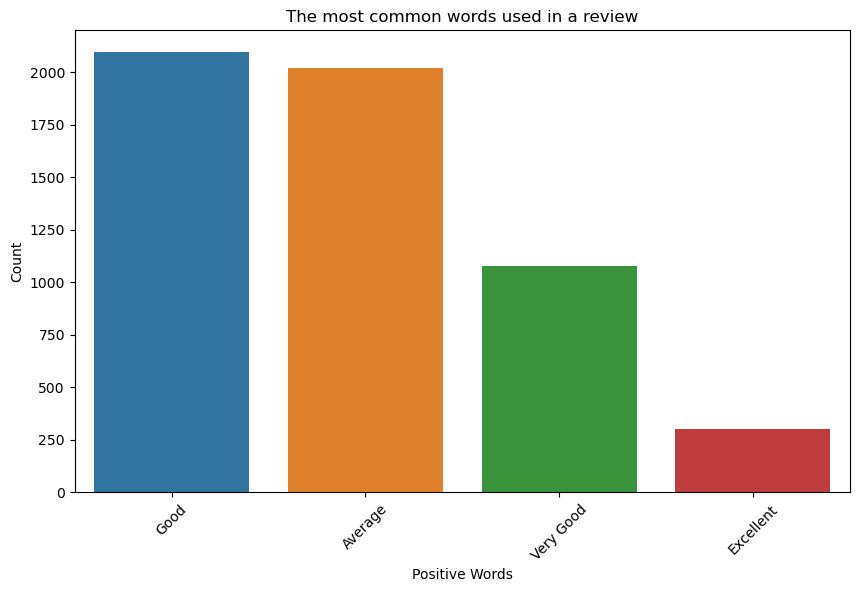

In [9]:
# Lets plot the above data.
plt.figure(figsize=(10,6))
sns.barplot(data=resturant_data_positive_words_plot,x="index",y="Rating text")
plt.title("The most common words used in a review")
plt.xlabel("Positive Words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Negative common words
resturant_data_Negative_rating = resturant_data["Aggregate rating"]<3.0
resturant_data_Negative_words = resturant_data[resturant_data_Negative_rating]
resturant_data_Negative_words_plot = resturant_data_Negative_words["Rating text"].value_counts().reset_index()
resturant_data_Negative_words_plot

,index,Rating text
0,Not rated,2148
1,Average,1247
2,Poor,186


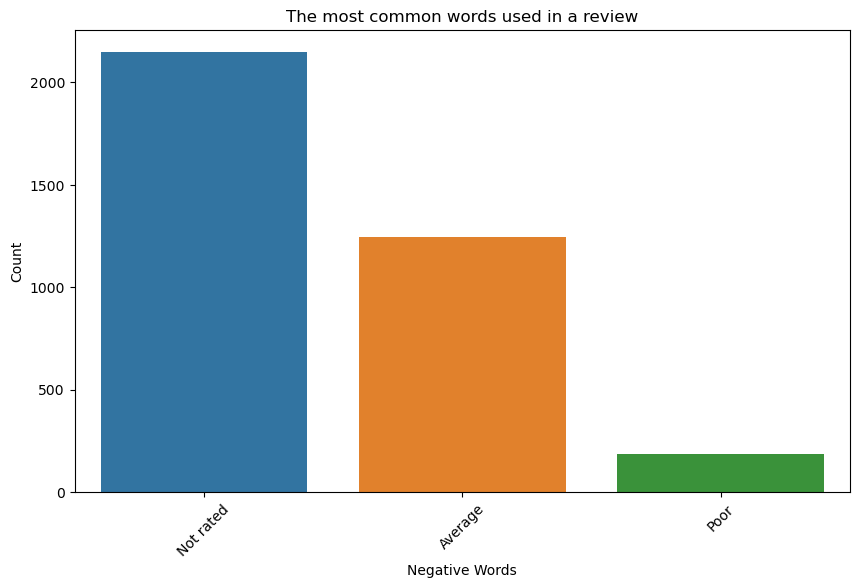

In [11]:
# Lets plot the above data.
plt.figure(figsize=(10,6))
sns.barplot(data=resturant_data_Negative_words_plot,x="index",y="Rating text")
plt.title("The most common words used in a review")
plt.xlabel("Negative Words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Task 1 : Restaurant Reviews

* **Calculate the average length of reviews and explore if there is a relationship between review length and rating.**

In [12]:
# Calculate review lengths 
def calculate_review_length(review): 
    return len(review.split())

In [13]:
# The average length of reviews and explore if there is a relationship between review length and rating.
resturant_data_review=resturant_data
resturant_data_review["Rating_Length"] = resturant_data["Rating text"].apply(calculate_review_length)
# Calculate average review length 
total_length = sum(resturant_data_review["Rating_Length"]) 
num_reviews = len(resturant_data_review) 
average_length = total_length / num_reviews 
print("Average Review Length:", average_length)

Average Review Length: 1.3380842590651856


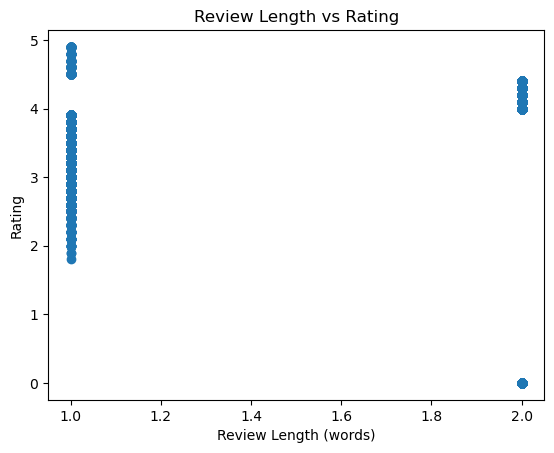

In [14]:
# Scatter plot to explore relationship between review length and rating 
plt.scatter(resturant_data_review["Rating_Length"], resturant_data_review['Aggregate rating']) 
plt.xlabel('Review Length (words)') 
plt.ylabel('Rating') 
plt.title('Review Length vs Rating') 
plt.show()

# Task 2 : Votes Analysis

* **Identify the restaurants with the highest and lowest number of votes.**

In [15]:
# The restaurants with the highest number of votes.
resturant_data_highest_votes = resturant_data.groupby('Restaurant Name')['Votes'].sum().reset_index().sort_values('Votes',ascending=False).head(10)
resturant_data_highest_votes.reset_index(drop=True)

,Restaurant Name,Votes
0,Barbeque Nation,28142
1,AB's - Absolute Barbecues,13400
2,Toit,10934
3,Big Chill,10853
4,Farzi Cafe,10098
5,Truffles,9682
6,Chili's,8156
7,Hauz Khas Social,7931
8,Joey's Pizza,7807
9,Peter Cat,7574


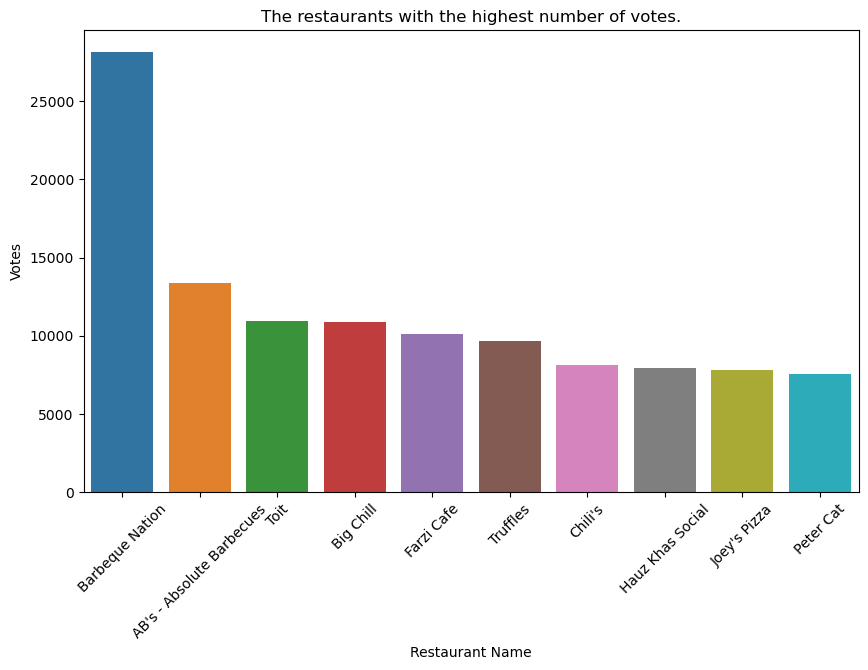

In [16]:
# Lets plot the above data.
plt.figure(figsize=(10,6))
sns.barplot(data=resturant_data_highest_votes,x="Restaurant Name",y="Votes")
plt.title("The restaurants with the highest number of votes.")
plt.xticks(rotation=45)
plt.show()

In [17]:
# The restaurants with the lowest number of votes.
resturant_data_lowest_votes = resturant_data.groupby('Restaurant Name')['Votes'].sum().sort_values()
print("The Resturant with the lowest rating:",resturant_data_lowest_votes.idxmin())

The Resturant with the lowest rating: London Eye - The Open Lounge


# Task 2 : Votes Analysis

* **Analyze if there is a correlation between the number of votes and the rating of a restaurant.**

In [18]:
#Analyze if there is a correlation between the number of votes and the rating of a restaurant.
resturant_data_correlation = resturant_data[["Votes","Aggregate rating"]].corr()
resturant_data_correlation

,Votes,Aggregate rating
Votes,1.000000,0.313474
Aggregate rating,0.313474,1.000000


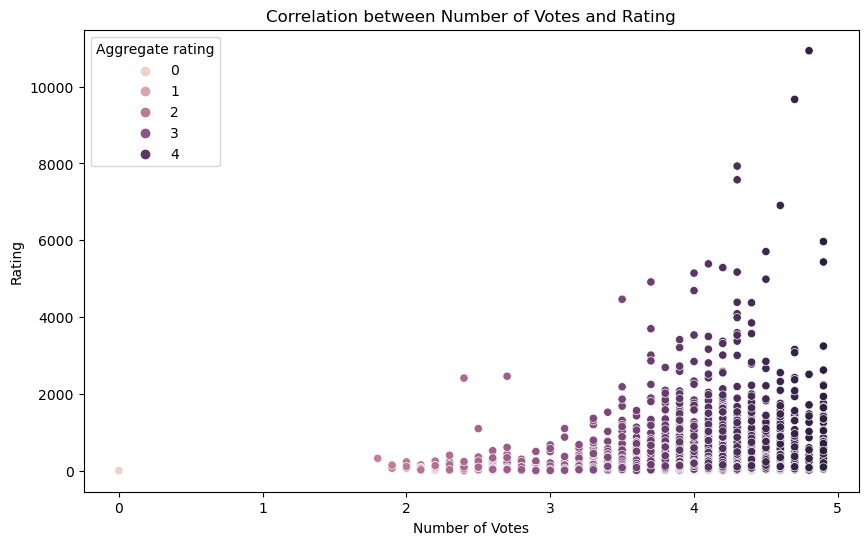

Given the above scatter charts we can see that there is a postive co-relation between Number of votes and Rating.


In [19]:
# Lets plot the data
# Scatter plot with regression line 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(y='Votes', x='Aggregate rating', data=resturant_data,hue='Aggregate rating') 
plt.xlabel('Number of Votes') 
plt.ylabel('Rating') 
plt.title('Correlation between Number of Votes and Rating') 
plt.show()
print("Given the above scatter charts we can see that there is a postive co-relation between Number of votes and Rating.")

# Task 3 : Price Range vs. Online Delivery and Table Booking

* **Analyze if there is a relationship between the price range and the availability of online delivery and table booking.**

In [20]:
resturant_data_T3 = ['Price range','Has Online delivery','Has Table booking']

resturant_data_price_delivery = pd.crosstab(resturant_data['Price range'], resturant_data['Has Online delivery'])
resturant_data_price_booking = pd.crosstab(resturant_data['Price range'], resturant_data['Has Table booking'])
resturant_data_price_delivery
resturant_data_price_booking

Has Table booking,No,Yes
Price range,,
1,4437,1
2,2874,239
3,761,644
4,312,274


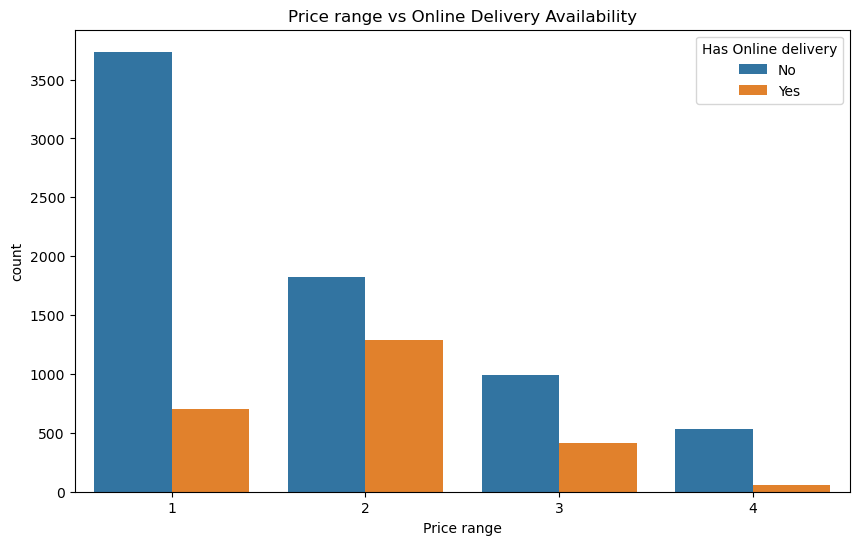

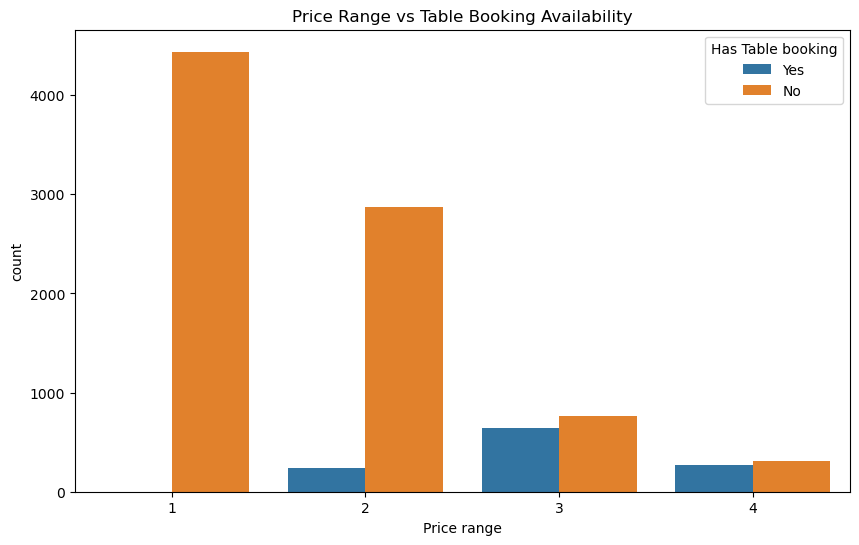

In [21]:
# Now lets plot this data.
# Plot for Online Delivery
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=resturant_data)
plt.title('Price range vs Online Delivery Availability')
plt.show()

# Plot for Table Booking
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', hue='Has Table booking', data=resturant_data)
plt.title('Price Range vs Table Booking Availability')
plt.show()


# Task 3 : Price Range vs. Online Delivery and Table Booking

* **Determine if higher-priced restaurants are more likely to offer these services.**

In [22]:
# Lets find high price resturants
print("The Average cost for 2 people :",resturant_data["Average Cost for two"].mean().round(2))

The Average cost for 2 people : 1200.33


### Here we are keeping a threshold of ₹1200.33 and we will apply a filter saying that price above 1200.33 are higher priced resturants.

In [23]:
# Restrant Price filter
resturant_data_price_filter = resturant_data["Average Cost for two"]>1200.33
resturant_data_price_filter_1 = resturant_data["Average Cost for two"]< 5000
new_resturant_data_price = resturant_data[resturant_data_price_filter&resturant_data_price_filter_1].reset_index(drop=True)
new_resturant_data_price[['Has Online delivery','Has Table booking','Average Cost for two']].head()

,Has Online delivery,Has Table booking,Average Cost for two
0,No,Yes,4000
1,No,No,1500
2,No,Yes,1500
3,No,Yes,2000
4,No,Yes,2000


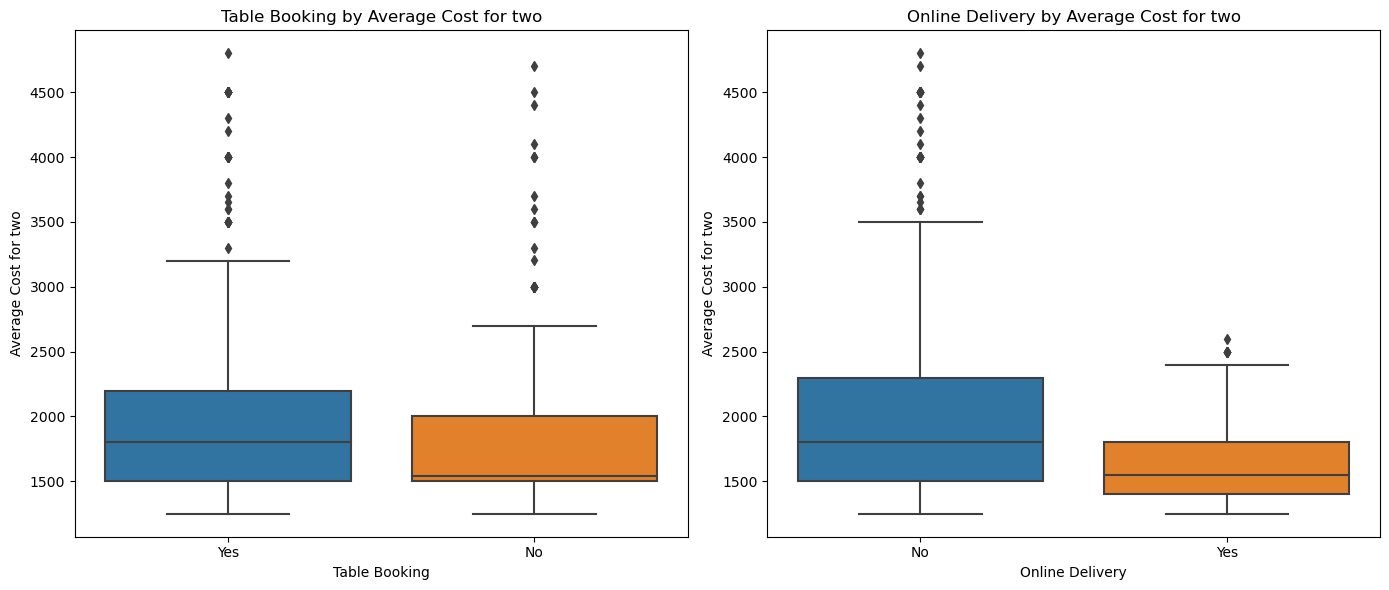

In [24]:
# Lets plot this data
plt.figure(figsize=(14, 6)) 
# Boxplot for Table Booking 
plt.subplot(1, 2, 1) 
sns.boxplot(y='Average Cost for two', x='Has Table booking', data=new_resturant_data_price) 
plt.title('Table Booking by Average Cost for two') 
plt.xlabel('Table Booking') 
# Boxplot for Online Delivery 
plt.subplot(1, 2, 2) 
sns.boxplot(y='Average Cost for two', x='Has Online delivery', data=new_resturant_data_price)
plt.title('Online Delivery by Average Cost for two') 
plt.xlabel('Online Delivery') 
# Display the plots 
plt.tight_layout() 
plt.show()

# Conclusion

* **Here we can see that higher priced resturants has high table bookings but less online Delivery.**